In [1]:
import os
import shutil
from PIL import Image
import numpy as np
import random
from tqdm import tqdm_notebook

In [3]:
dir_ = "data"
market_path_train = "/Market-1501-v15.09.15/bounding_box_train"
market_path_test = "/Market-1501-v15.09.15/bounding_box_test"
dist_market_path_train = "/train"
dist_market_path_test = "/test"
files_train = os.listdir(dir_ + market_path_train)
files_test = os.listdir(dir_ + market_path_test)

In [5]:
for file in files_train:
    path_ = dir_ + dist_market_path_train + '/' + file.split('_')[0]
    if not os.path.exists(path_):
        os.makedirs(path_)
    shutil.copy(dir_ + market_path_train + '/' + file, path_ + '/' + file)
    
for file in files_test:
    path_ = dir_ + dist_market_path_test + '/' + file.split('_')[0]
    if not os.path.exists(path_):
        os.makedirs(path_)
    shutil.copy(dir_ + market_path_test + '/' + file, path_ + '/' + file)

In [52]:
list_arr = []

In [57]:
dirs = os.listdir(dir_ + dist_market_path)
for dirr in dirs:
    files = os.listdir(dir_ + dist_market_path + '/' + dirr)
    for file in files:
        im = Image.open(dir_ + dist_market_path + '/' + dirr + '/' + file)
        im2arr = np.array(im) 
        list_arr.append(im2arr)

In [102]:
list_false = []
dirs = os.listdir(dir_ + dist_market_path)

#for False
n = 10000
for i in tqdm_notebook(range(n)):
    dir_1, dir_2 = random.sample(dirs, 2)
    files_1 = os.listdir(dir_ + dist_market_path + '/' + dir_1)
    files_2 = os.listdir(dir_ + dist_market_path + '/' + dir_2)
    file_1 = random.choice(files_1)
    file_2 = random.choice(files_2)
    im_1 = np.array(Image.open(dir_ + dist_market_path + '/' + dir_1 + '/' + file_1))
    im_2 = np.array(Image.open(dir_ + dist_market_path + '/' + dir_2 + '/' + file_2))
    list_false.append([im_1, im_2, "False"])

In [103]:
im_1 = Image.fromarray(list_false[9567][0])
im_2 = Image.fromarray(list_false[9567][1])

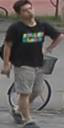

In [104]:
im_1

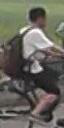

In [105]:
im_2

In [106]:
list_true = []
dirs = os.listdir(dir_ + dist_market_path)

#for True
n = 1000
for i in tqdm_notebook(range(n)):
    dirr = random.choice(dirs)
    files = os.listdir(dir_ + dist_market_path + '/' + dirr)
    file_1, file_2 = random.sample(files, 2)
    im_1 = np.array(Image.open(dir_ + dist_market_path + '/' + dirr + '/' + file_1))
    im_2 = np.array(Image.open(dir_ + dist_market_path + '/' + dirr + '/' + file_2))
    list_true.append([im_1, im_2, "True"])

In [110]:
im_1 = Image.fromarray(list_true[941][0])
im_2 = Image.fromarray(list_true[941][1])

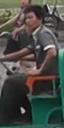

In [111]:
im_1

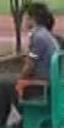

In [112]:
im_2

In [142]:
list_all = list_false + list_true
random.shuffle(list_all)

In [143]:
im_1 = Image.fromarray(list_all[1062][0])
im_2 = Image.fromarray(list_all[1062][1])
list_all[1062][2]

'False'

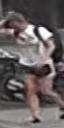

In [144]:
im_1

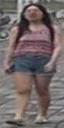

In [145]:
im_2

In [149]:
im_1 = Image.fromarray(list_all[1065][0])
im_2 = Image.fromarray(list_all[1065][1])
list_all[1065][2]

'True'

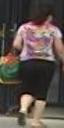

In [150]:
im_1

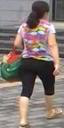

In [151]:
im_2

### Metrics:
##### 1) Precision
##### 2) Recall
##### 3) AUC-ROC
отношение между 
TPR = TP / (TP + FN) и
FPR = FP / (FP + TN)
##### 4) mAP
отношение между
Precision и
Recall

In [173]:
len_per = 0.7
len_train = int(len(list_all)*len_per)
train = list_all[0:len_train]
test = list_all[len_train:len(list_all)]

In [174]:
print(len(train), len(test), len(train)+len(test))

7699 3301 11000
